In [6]:
import numpy as np
import imageio
import cv2 as cv2
import matplotlib.pyplot as plt
import glob

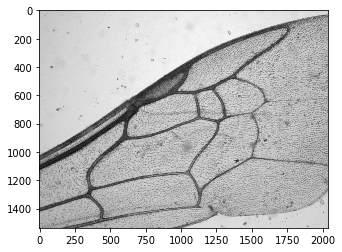

In [10]:
im = cv2.imread('../TEST/03_inf.jpg')
img = cv2.cvtColor(im, cv.COLOR_BGR2GRAY)
img.shape, img.dtype
plt.imshow(img, cmap='gray')

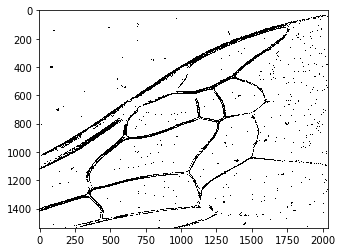

In [26]:
bin_img = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv.THRESH_BINARY,179,28)
plt.imshow(bin_img, cmap = 'gray')

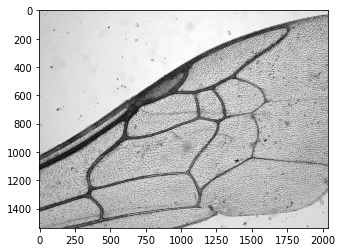

In [15]:
blur = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur, cmap='gray')

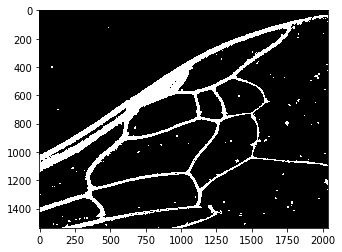

In [16]:
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 3)
plt.imshow(opening, cmap='gray')

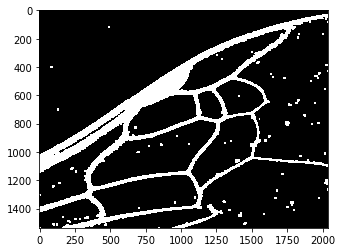

In [17]:
bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(bg, cmap='gray')

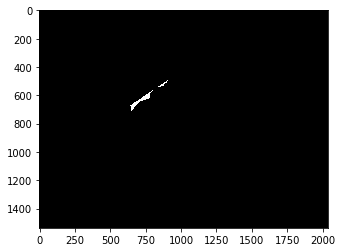

In [20]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
fg = np.uint8(fg)
plt.imshow(fg, cmap='gray')

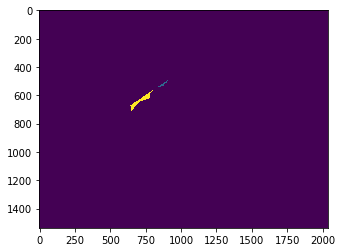

In [22]:
unknown = cv2.subtract(bg,fg)
retval, markers = cv2.connectedComponents(fg)
#markers = markers+1
#markers[unknown==255] = 0
#markers = cv2.watershed(img,markers)
plt.imshow(markers)

In [27]:
train_imgs = np.array([np.array(imageio.imread(filename)) for filename in glob.glob('../TRAIN/*.jpg')])
print(train_imgs.shape)

(32,)


(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2048)
(1536, 2048)
(2039, 1536)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2048)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2048)
(1536, 2039)
(1536, 2039)
(1536, 2048)
(1536, 2039)
(1536, 2039)
(1536, 2039)


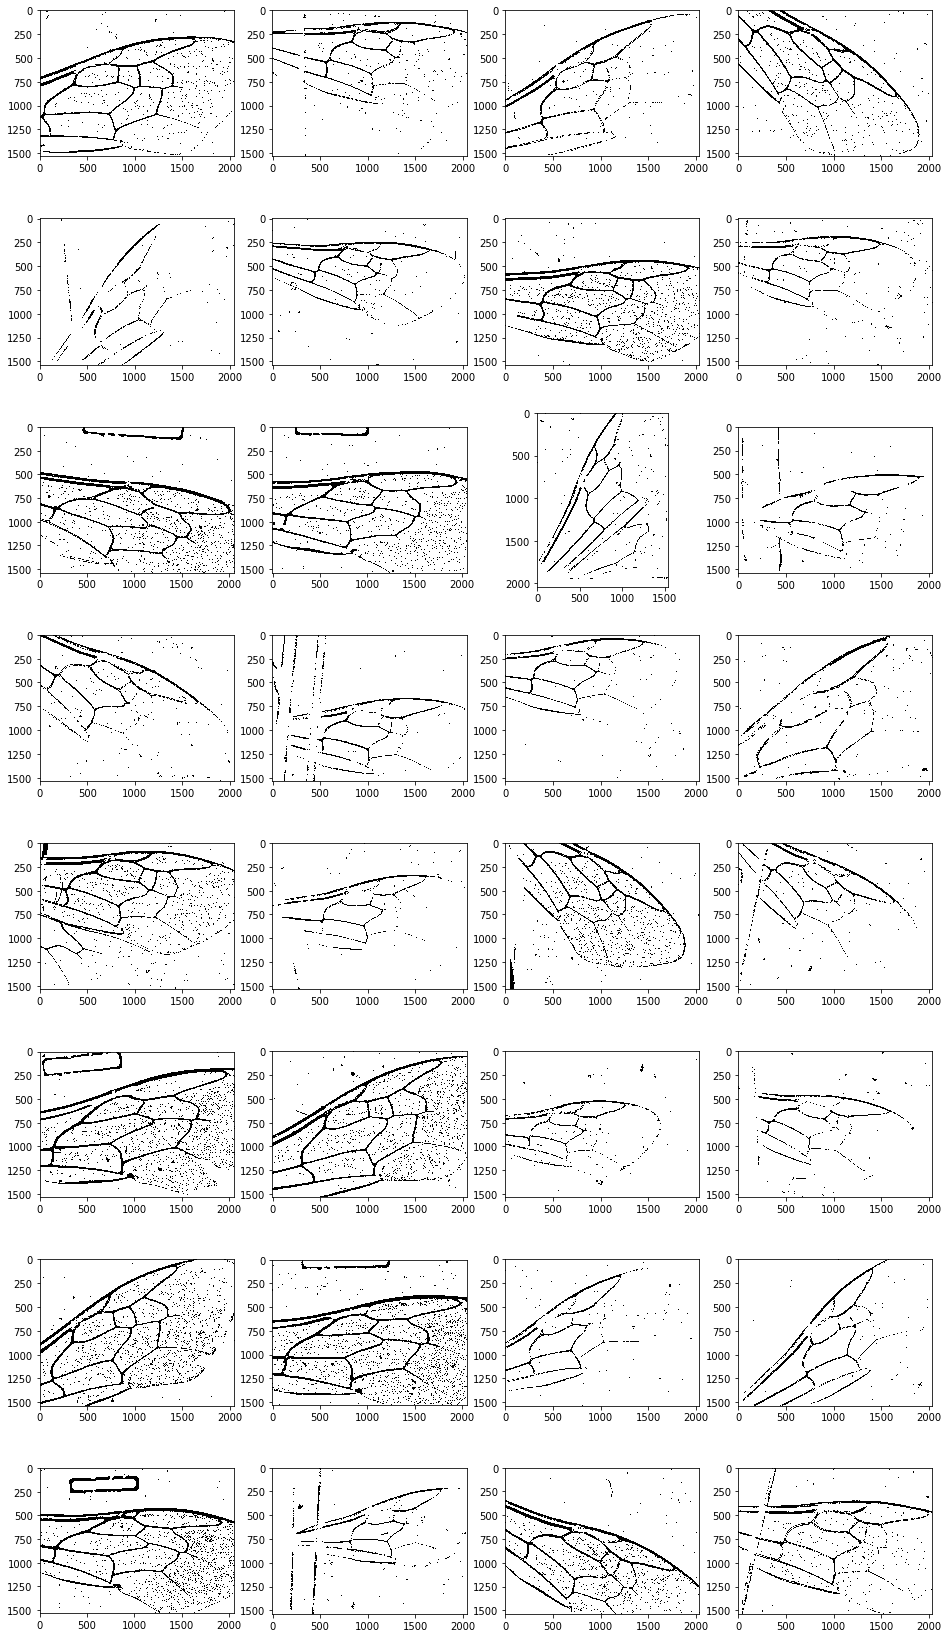

In [30]:
fig=plt.figure(figsize=(16, 30))
bin_imgs = []
for i in range(train_imgs.shape[0]):
    img_gray = cv.cvtColor(train_imgs[i], cv.COLOR_BGR2GRAY)
    print(img_gray.shape)
    binarized = cv.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv.THRESH_BINARY, 179, 28)
    bin_imgs.append(binarized)
    bin_imgs[i] = binarized
    fig.add_subplot(8, 4, i+1)
    plt.imshow(binarized, cmap='gray')
plt.show()

(1536, 2039)


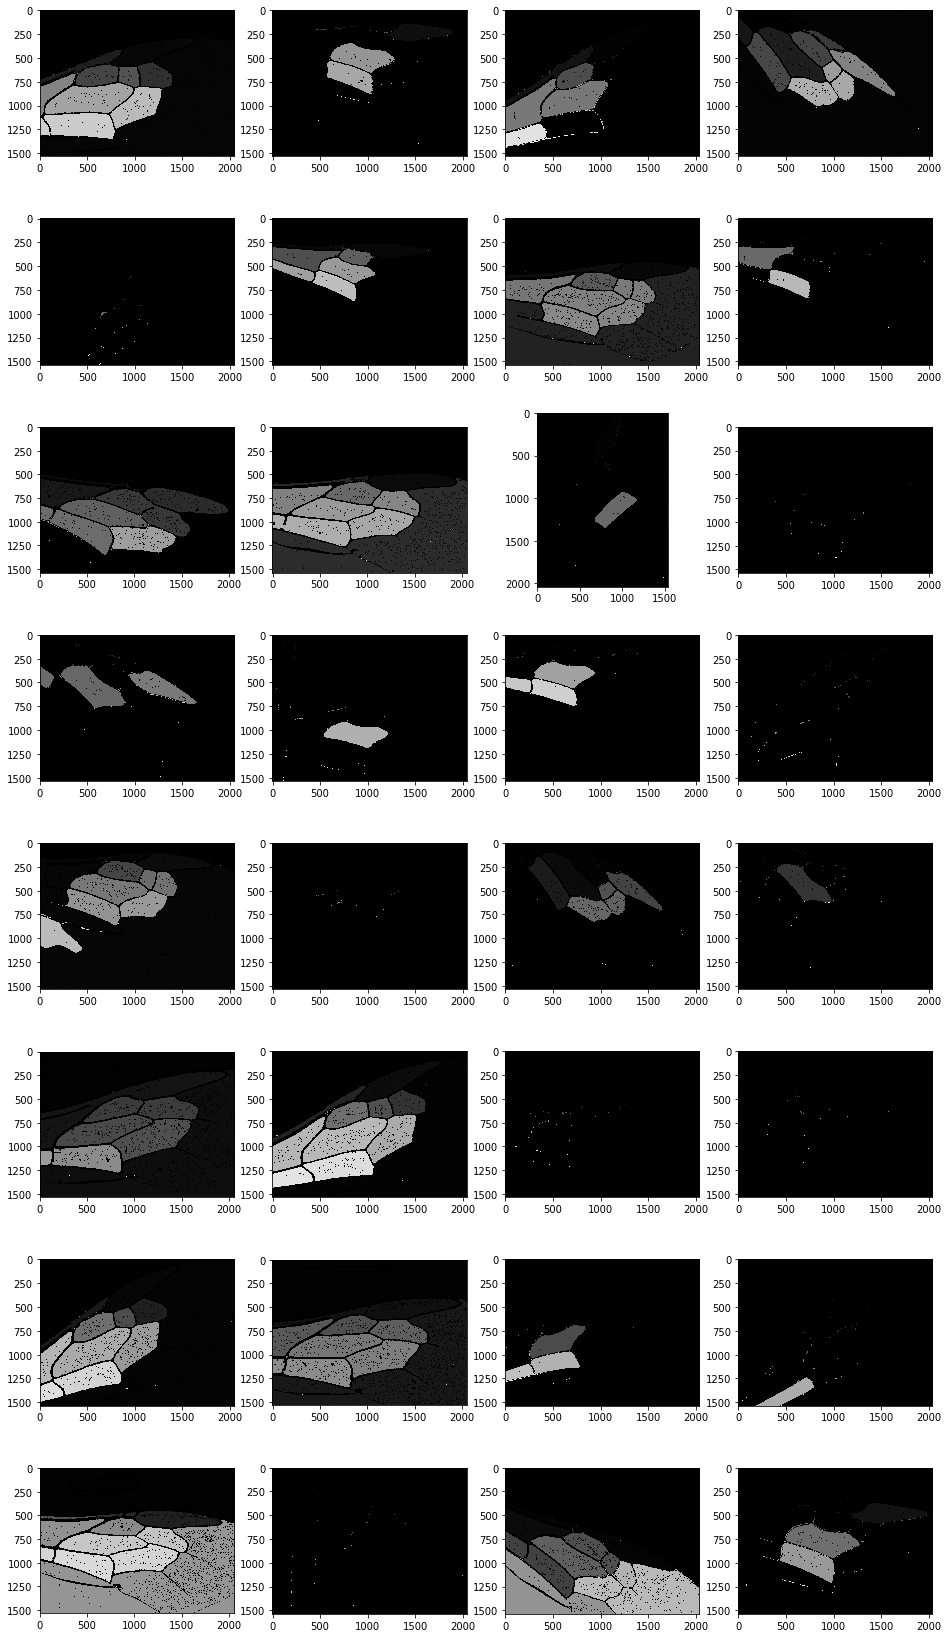

In [39]:
binarized = np.asarray(binarized, dtype=np.uint8)
print(binarized.shape)
fig=plt.figure(figsize=(16, 30))
for i in range(len(bin_imgs)):
    ret, labels = cv.connectedComponents(bin_imgs[i])
    fig.add_subplot(8, 4, i+1)
    plt.imshow(labels, cmap='gray')
plt.show()

In [39]:
kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")

output_image = cv.morphologyEx(img, cv.MORPH_HITMISS, kernel)

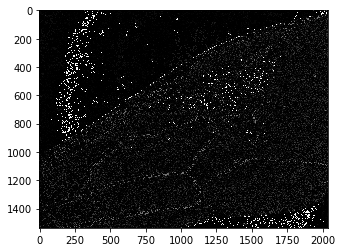

In [9]:
plt.imshow(output_image, cmap= 'gray')